In [14]:
import geopandas
import pandas
import matplotlib.pyplot as plt

In [25]:
def polygon_to_point(df):
            df_with_centroid = df.copy()
            df_with_centroid['geometry'] = df.centroid

            return df_with_centroid

        # Join all points that lie in a polygon with that feature
def find_intersects(df_polygon, df_centroids):
    datasubset = [geopandas.sjoin(df_polygon.loc[[k]], df_centroids)
                  for k in df_polygon.index]
    return pandas.concat(datasubset)

    

In [5]:
parcels = geopandas.read_file('testdata/MN_PLUTO_SUBSET.shp')
source = geopandas.read_file('testdata/nad_subset.shp')
print(parcels.crs)
print(source.crs)

source['centroids'] = source.centroid

source2 = source.copy()
source2['geometry'] = source.centroid


{'init': 'epsg:2263'}
{'proj': 'lcc', 'lat_1': 40.66666666666666, 'lat_2': 41.03333333333333, 'lat_0': 40.16666666666666, 'lon_0': -74, 'x_0': 300000.0000000001, 'y_0': 0, 'ellps': 'GRS80', 'units': 'us-ft', 'no_defs': True}


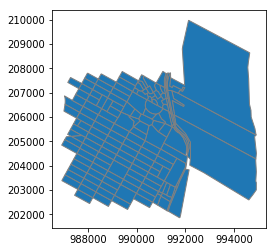

In [68]:
fig, ax = plt.subplots()
parcels.shape
# parcels.plot(edgecolor='gray', color='#B3E5FC', ax=ax)
source.plot(edgecolor='',markersize=.5, ax=ax)

In [26]:
parcel_centroids = polygon_to_point(parcels)
source_centroids = polygon_to_point(source)

In [99]:
import time

start = time.time()
blocks_in_parcels = find_intersects(parcels, source_centroids)
print(time.time() - start)
# print(blocks_in_parcels.shape)
parcels_in_blocks = find_intersects(source, parcel_centroids)
print(time.time() - start)

29.236145496368408
36.49454188346863


In [52]:
blocks_in_parcels.shape

(89, 101)

In [100]:
blocks_in_parcels_onlydupes = blocks_in_parcels[blocks_in_parcels.index.duplicated(keep=False)]
parcels_in_blocks_onlydupes = parcels_in_blocks[parcels_in_blocks.index.duplicated(keep=False)]
print(blocks_in_parcels.shape)

(89, 101)


(986936.5170825669, 992292.7943654801, 202892.2989495394, 207860.78133141148)

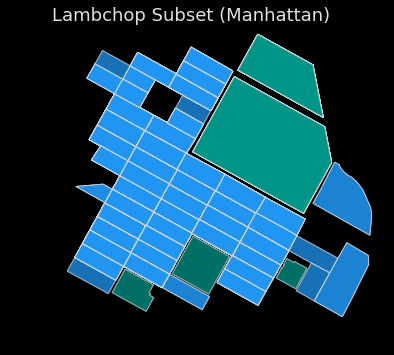

In [104]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 10), facecolor='black')
blocks_in_parcels_onlydupes.plot(edgecolor='#E0E0E0', color='#009688', ax=ax, alpha=.5)
parcels_in_blocks_onlydupes.plot(edgecolor='#E0E0E0', color='#2196F3', ax=ax, alpha=.5)
ax.set_title('Lambchop Subset (Manhattan)', color='#E0E0E0', 
             loc='left', 
             fontsize=18,
            pad=0)
plt.axis('off')